<a href="https://colab.research.google.com/github/puneethgp/data_analysis/blob/main/kpmg_virtual_internship_first_module_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data Quality Assessment***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## **Transcation sheet**

In [2]:
# this sheet contains multiple sheets so pass the sheet name argument to read excel 
tran_df = pd.read_excel(r"/content/KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='Transactions')
tran_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


###  Fixing the header row ,index column and other columns

In [3]:
# first should be column names for the dataset
col = tran_df.loc[0]
tran_df = tran_df[1:]
tran_df.rename(columns=col,inplace=True)
tran_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [4]:
# out of 26 columns only 13 columns were useful so remove 
tran_df = tran_df.iloc[:,:13]
tran_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [5]:
# setting transaction id as index
tran_df.set_index('transaction_id',inplace = True)
tran_df.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


### Applying transformation of columns

In [6]:
tran_df.dtypes

product_id                 object
customer_id                object
transaction_date           object
online_order               object
order_status               object
brand                      object
product_line               object
product_class              object
product_size               object
list_price                 object
standard_cost              object
product_first_sold_date    object
dtype: object

#### converting date time columns 
making changes in timestamps and other date columns

In [7]:
# we see transaction_date column as object dtype, we will change it to datetime dtype
tran_df.transaction_date = pd.to_datetime(tran_df.transaction_date)

#product first_sold_date is a timestamp in object dtype
tran_df.product_first_sold_date = pd.to_datetime(tran_df.product_first_sold_date,unit = 's')

In [8]:
#changing dtypes for few columns
tran_df = tran_df.astype({'product_id':int,"customer_id":int,'list_price':float,"standard_cost":float,'online_order':bool,'list_price':float})

In [9]:
tran_df.dtypes

product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                         bool
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date    datetime64[ns]
dtype: object

In [10]:
tran_df.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25
2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01
3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01
4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25
5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46


In [11]:
tran_df.describe()

,product_id,customer_id,list_price,standard_cost
count,20000.00000,20000.000000,20000.000000,19803.000000
mean,45.36465,1738.246050,1107.829449,556.046951
std,30.75359,1011.951046,582.825242,405.955660
min,0.00000,1.000000,12.010000,7.210000
25%,18.00000,857.750000,575.270000,215.140000
50%,44.00000,1736.000000,1163.890000,507.580000
75%,72.00000,2613.000000,1635.300000,795.100000
max,100.00000,5034.000000,2091.470000,1759.850000


#### Dealing with null values

In [12]:
tran_df.isnull().sum()

product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [13]:
tran_df.online_order = tran_df.online_order.map({True:1,False:0})
tran_df.online_order = tran_df.online_order.astype(int)

In [14]:
tran_df.dtypes

product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                        int64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date    datetime64[ns]
dtype: object

In [15]:
tran_df.order_status.value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

We can either drop the columns with cancelled order or just keep it as it is

In [16]:
tran_df.isnull().sum()

product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

We can either remove all the 197 rows or fill them most repeated value of that column

In [17]:
tran_df.product_line.mode()

0    Standard
dtype: object

In [18]:
tran_df.product_class.value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [19]:
tran_df.product_size.value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [20]:
tran_df.standard_cost.value_counts()

388.920000    465
954.820000    396
53.620000     274
161.600000    235
260.140000    233
             ... 
151.960000    124
206.350000    114
270.299988      1
667.400024      1
312.735016      1
Name: standard_cost, Length: 103, dtype: int64

In [21]:
np.mean(tran_df.standard_cost)

556.0469512209421

In [22]:
# tran_df['product_first_sold_date'] = pd.TimedeltaIndex(tran_df['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)

In [23]:
tran_df.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25
2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01
3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01
4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25
5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46


In [24]:
tran_df.isna().sum()

product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [25]:
tran_df.fillna({'brand':tran_df.brand.mode()[0],"product_class":tran_df.product_class.mode()[0],"product_line":tran_df.product_line.mode()[0],"product_size":tran_df.product_size.mode()[0],"standard_cost":np.mean(tran_df.standard_cost),"product_first_sold_date":pd.to_datetime(tran_df.product_first_sold_date).dt.year.mode()[0]},inplace = True)

In [26]:
tran_df.brand.mode()

0    Solex
dtype: object

In [27]:
tran_df[tran_df.index.duplicated()]

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,


No duplicated columns are present in the the dataset so no need to delete any rows

In [28]:
tran_df.isna().sum()

product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [29]:
tran_df.customer_id.nunique()

3494

##  **New Customer list** 

In [30]:
# this sheet contains multiple sheets so pass the sheet name argument to read excel 
new_cust = pd.read_excel(r"/content/KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='NewCustomerList',header=1,index_col=0)
new_cust.head()

,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
first_name,,,,,,,,,,,,,,,,,,,,,,
Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [31]:
new_cust = new_cust.iloc[:,:15]

In [32]:
new_cust.shape

(1000, 15)

In [33]:
new_cust.columns

Index(['last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode',
       'state', 'country', 'property_valuation'],
      dtype='object')

In [34]:
pd.set_option("display.max_columns",23)

In [35]:
new_cust.head()

,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
first_name,,,,,,,,,,,,,,,
Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6
Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11
Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5
Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1
Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9


In [36]:
new_cust.shape

(1000, 15)

In [37]:
new_cust.columns[16:21]

Index([], dtype='object')

In [38]:
new_cust

,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
first_name,,,,,,,,,,,,,,,
Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6
Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11
Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5
Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1
Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7
Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10
Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2


In [39]:
new_cust.job_industry_category.unique()

array(['Manufacturing', 'Property', 'Financial Services', 'Entertainment',
       'Retail', 'IT', 'Telecommunications', 'Health', nan, 'Argiculture'],
      dtype=object)

In [40]:
new_cust.dtypes

last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
dtype: object

In [41]:
new_cust.rename({"past_3_years_bike_related_purchases":'other_purchases',"job_industry_category":"job_industry"},axis = 1,inplace=True)

In [42]:
new_cust = new_cust.astype({"other_purchases":int,"tenure":int,"property_valuation" :int})

In [43]:
new_cust.head()

,last_name,gender,other_purchases,DOB,job_title,job_industry,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
first_name,,,,,,,,,,,,,,,
Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6
Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11
Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5
Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1
Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9


In [44]:
new_cust.isnull().sum()

last_name              29
gender                  0
other_purchases         0
DOB                    17
job_title             106
job_industry          165
wealth_segment          0
deceased_indicator      0
owns_car                0
tenure                  0
address                 0
postcode                0
state                   0
country                 0
property_valuation      0
dtype: int64

In [45]:
#if person dont have last name fill it with "." or we can fill it with first name
new_cust.last_name = new_cust.last_name.fillna(".")

In [46]:
new_cust.job_title.value_counts()

Associate Professor             15
Environmental Tech              14
Software Consultant             14
Chief Design Engineer           13
Assistant Media Planner         12
                                ..
Automation Specialist IV         1
Human Resources Assistant IV     1
Engineer II                      1
Staff Accountant II              1
Software Test Engineer II        1
Name: job_title, Length: 184, dtype: int64

In [47]:
new_cust.DOB = pd.to_datetime(new_cust.DOB)

In [48]:
pd.to_datetime(new_cust.DOB).dt.year.mode()

0    1974.0
dtype: float64

In [49]:
new_cust.DOB.fillna('1974-01-01',inplace = True)

In [50]:
new_cust["year"] = new_cust.DOB.apply(lambda x : str(x).split("-")[0])

In [51]:
new_cust.year.sort_values()

first_name
Letizia      1938
Kippar       1938
Zachariah    1938
Anthony      1938
Alleen       1938
             ... 
Isak         2001
Tomkin       2001
Lura         2002
Giulietta    2002
Simmonds     2002
Name: year, Length: 1000, dtype: object

In [52]:
new_cust.dropna(inplace=True)

In [53]:
new_cust.isna().sum()

last_name             0
gender                0
other_purchases       0
DOB                   0
job_title             0
job_industry          0
wealth_segment        0
deceased_indicator    0
owns_car              0
tenure                0
address               0
postcode              0
state                 0
country               0
property_valuation    0
year                  0
dtype: int64

##**Customer Demo sheet**

In [54]:
cust_demo = pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='CustomerDemographic',header=1,index_col=0)
cust_demo.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [55]:
cust_demo.dropna(axis=1,how='all',inplace = True)

In [56]:
cust_demo.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [57]:
cust_demo = cust_demo.loc[:,cust_demo.columns.notnull()]
cust_demo.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [58]:
cust_demo.drop("default",axis = 1,inplace = True)

In [59]:
cust_demo.isna().sum()

first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [60]:
cust_demo.rename({"past_3_years_bike_related_purchases":"other_purchases","job_industry_category":"job_industry"},axis = 1,inplace = True)

In [61]:
cust_demo.head()

,first_name,last_name,gender,other_purchases,DOB,job_title,job_industry,wealth_segment,deceased_indicator,owns_car,tenure
customer_id,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [62]:
cust_demo.gender.value_counts()

Female    2037
Male      1872
U           88
M            1
Femal        1
F            1
Name: gender, dtype: int64

In [63]:
cust_demo.gender.replace({"Female":"F","Male":"M","Femal":"F","U":"Not Specified"},inplace=True)

In [64]:
cust_demo.gender.value_counts()

F                2039
M                1873
Not Specified      88
Name: gender, dtype: int64

In [65]:
cust_demo.DOB = pd.to_datetime(cust_demo.DOB).dt.date

In [66]:
pd.to_datetime(cust_demo.DOB).dt.year.mode()

0    1978.0
dtype: float64

In [67]:
cust_demo.DOB.fillna('1978-01-01',inplace = True)

In [68]:
cust_demo.DOB = pd.to_datetime(cust_demo.DOB)

In [69]:
cust_demo["year"] = cust_demo.DOB.dt.year

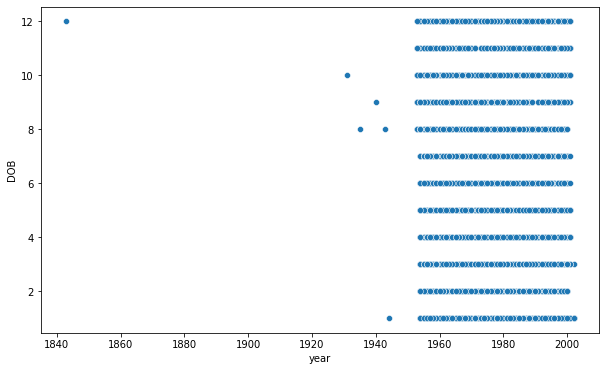

In [70]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=cust_demo.year,y=cust_demo.DOB.dt.month)

In [71]:
cust_demo.year.sort_values()

customer_id
34      1843
720     1931
1092    1935
3410    1940
2413    1943
        ... 
422     2002
2296    2002
2858    2002
3435    2002
1888    2002
Name: year, Length: 4000, dtype: int64

In [72]:
#strange error in DOB column with 1843 
cust_demo.drop(34,axis = 0,inplace=True)

In [73]:
cust_demo.columns

Index(['first_name', 'last_name', 'gender', 'other_purchases', 'DOB',
       'job_title', 'job_industry', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'year'],
      dtype='object')

In [74]:
cust_demo.drop(['year'],axis=1)

,first_name,last_name,gender,other_purchases,DOB,job_title,job_industry,wealth_segment,deceased_indicator,owns_car,tenure
customer_id,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...
3996,Rosalia,Halgarth,F,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0
3997,Blanch,Nisuis,F,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0
3998,Sarene,Woolley,Not Specified,60,1978-01-01,Assistant Manager,IT,High Net Worth,N,No,NaN


In [75]:
cust_demo.last_name.fillna('.',inplace=True)

In [76]:
cust_demo.isna().sum()

first_name              0
last_name               0
gender                  0
other_purchases         0
DOB                     0
job_title             506
job_industry          656
wealth_segment          0
deceased_indicator      0
owns_car                0
tenure                 87
year                    0
dtype: int64

In [77]:
cust_demo.tenure.fillna(np.mean(cust_demo.tenure),inplace = True)

In [78]:
np.mean(cust_demo.tenure)

10.654652351738255

In [79]:
cust_demo.dropna(subset=['job_title','job_industry'],axis = 0,inplace = True)

In [80]:
cust_demo.isna().sum()

first_name            0
last_name             0
gender                0
other_purchases       0
DOB                   0
job_title             0
job_industry          0
wealth_segment        0
deceased_indicator    0
owns_car              0
tenure                0
year                  0
dtype: int64

In [81]:
cust_demo.drop_duplicates(inplace=True)

In [82]:
cust_demo.dtypes

first_name                    object
last_name                     object
gender                        object
other_purchases                int64
DOB                   datetime64[ns]
job_title                     object
job_industry                  object
wealth_segment                object
deceased_indicator            object
owns_car                      object
tenure                       float64
year                           int64
dtype: object

In [83]:
cust_demo = cust_demo.astype({"other_purchases":int,"tenure":int})

In [84]:
cust_demo.head()

,first_name,last_name,gender,other_purchases,DOB,job_title,job_industry,wealth_segment,deceased_indicator,owns_car,tenure,year
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,1953
2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,1980
3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15,1954
9,Mala,Lind,F,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8,1973
10,Fiorenze,Birdall,F,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20,1988


## **CustomerAddress**

In [85]:
cust_add = pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='CustomerAddress',header=1,index_col=0 )
cust_add

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...
3999,1482 Hauk Trail,3064,VIC,Australia,3
4000,57042 Village Green Point,4511,QLD,Australia,6
4001,87 Crescent Oaks Alley,2756,NSW,Australia,10


In [86]:
cust_add.dropna(how='all',axis=1,inplace = True)

In [87]:
#removing the nan values
cust_add = cust_add.loc[:,cust_add.columns.notnull()]

In [88]:
cust_add.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [89]:
cust_add.drop_duplicates()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...
3999,1482 Hauk Trail,3064,VIC,Australia,3
4000,57042 Village Green Point,4511,QLD,Australia,6
4001,87 Crescent Oaks Alley,2756,NSW,Australia,10


In [90]:
#since all values in country column is Australia it doesnt provide any info so we can delete or rename dataframe with australia dataset

In [91]:
cust_add.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [92]:
cust_add.state.replace({'New South Wales':"NSW","Victoria":"VIC"},inplace = True)

In [93]:
cust_add.drop_duplicates(inplace=True)
#no duplicates to remove

In [94]:
cust_add.property_valuation.value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

Delete this latter 

In [95]:
tran_df

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25
2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01
3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01
4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25
5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46
...,...,...,...,...,...,...,...,...,...,...,...,...
19996,51,1018,2017-06-24,1,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01 10:30:23
19997,41,127,2017-11-09,1,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01 09:52:40
19998,87,2284,2017-04-14,1,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01 11:13:30


In [96]:
cust_add

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,NSW,Australia,10
2,6 Meadow Vale Court,2153,NSW,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,NSW,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...
3999,1482 Hauk Trail,3064,VIC,Australia,3
4000,57042 Village Green Point,4511,QLD,Australia,6
4001,87 Crescent Oaks Alley,2756,NSW,Australia,10


In [97]:
cust_demo

,first_name,last_name,gender,other_purchases,DOB,job_title,job_industry,wealth_segment,deceased_indicator,owns_car,tenure,year
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,1953
2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,1980
3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15,1954
9,Mala,Lind,F,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8,1973
10,Fiorenze,Birdall,F,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20,1988
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,Stephie,Byars,F,5,1989-04-07,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,No,12,1989
3995,Rusty,Iapico,M,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14,1975
3996,Rosalia,Halgarth,F,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19,1975
